In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\51010243\Downloads\fire_alarm.csv'  # Replace 'your_dataset.csv' with the actual file path

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Explore the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None
         Unnamed: 0       

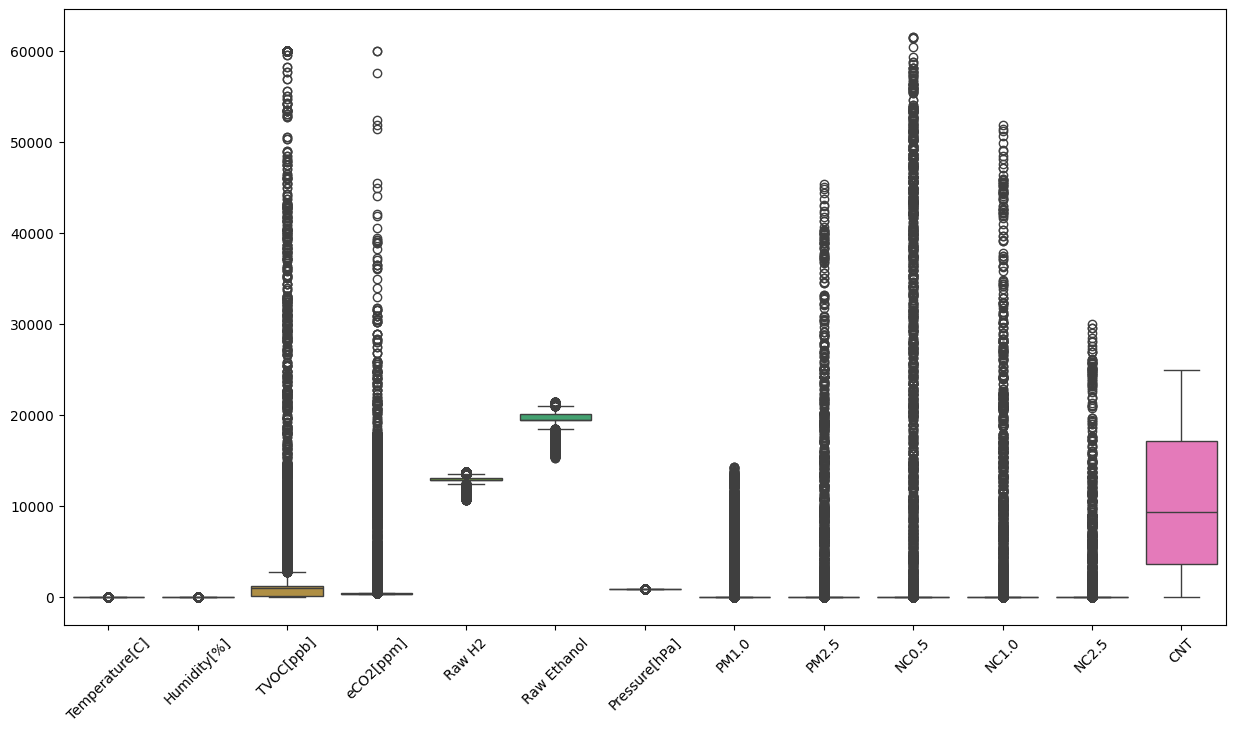

In [3]:
#To check the outliers using Box Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with numerical data for box plots
numerical_columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT']

# Create box plots for numerical columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.show()


In [4]:
#To check Outliers using Z score 
from scipy import stats

z_scores = stats.zscore(df[numerical_columns])
outliers = (abs(z_scores) > 3).all(axis=1)

# Display rows with outliers
print(df[outliers])

Empty DataFrame
Columns: [Unnamed: 0, UTC, Temperature[C], Humidity[%], TVOC[ppb], eCO2[ppm], Raw H2, Raw Ethanol, Pressure[hPa], PM1.0, PM2.5, NC0.5, NC1.0, NC2.5, CNT, Fire Alarm]
Index: []


In [5]:
#Balancing the datasets
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Before balancing
print("Before balancing:")
print(y_train.value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# After balancing
print("\nAfter balancing:")
print(pd.Series(y_resampled).value_counts())


Before balancing:
Fire Alarm
1    35825
0    14279
Name: count, dtype: int64

After balancing:
Fire Alarm
1    35825
0    35825
Name: count, dtype: int64


In [21]:
#Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
df[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'PM1.0', 'PM2.5']] = scaler.fit_transform(df[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'PM1.0', 'PM2.5']])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Handling Time Series Data
df['UTC'] = pd.to_datetime(df['UTC'], unit='s')
df['hour'] = df['UTC'].dt.hour
df['day_of_week'] = df['UTC'].dt.dayofweek

#Dimensionality Reduction
df['UTC'] = pd.to_datetime(df['UTC'], unit='s')
df['hour'] = df['UTC'].dt.hour
df['day_of_week'] = df['UTC'].dt.dayofweek

#Handling categorial Variable
# Assuming 'df' is your DataFrame
# Convert 'UTC' to datetime format
df['UTC'] = pd.to_datetime(df['UTC'], unit='s')

# Extract additional features from timestamps
df['hour'] = df['UTC'].dt.hour
df['day_of_week'] = df['UTC'].dt.dayofweek

# Handling categorical variables
# Replace 'categorical_column' with the actual name of your categorical column
# For example, if 'Category' is a categorical column, use: df['Category']
# If you don't have a specific categorical column, you can skip this step.
# In this example, I'm assuming 'Category' is the name of your categorical column.
categorical_column = 'Category'
if categorical_column in df.columns:
    df = pd.get_dummies(df, columns=[categorical_column])


#Feature Engineering
df['temp_humidity_ratio'] = df['Temperature[C]'] / df['Humidity[%]']
df['air_quality_index'] = df['TVOC[ppb]'] * df['eCO2[ppm]']
df['pm_ratio'] = df['PM1.0'] / df['PM2.5']

#Handling highly coorelated feature
corr_matrix = df.corr()

#Handling scerewed data
# Assuming df is your DataFrame
# Check for NaN or negative values before applying log1p
mask = (df['Temperature[C]'] > -1) & (df['Humidity[%]'] > -1) & (df['TVOC[ppb]'] > -1)

# Apply log1p only to the valid values
df.loc[mask, 'skew_corrected_Temperature'] = np.log1p(df.loc[mask, 'Temperature[C]'])
df.loc[mask, 'skew_corrected_Humidity'] = np.log1p(df.loc[mask, 'Humidity[%]'])
df.loc[mask, 'skew_corrected_TVOC'] = np.log1p(df.loc[mask, 'TVOC[ppb]'])




In [30]:
print("Training Set - Class Distribution:")
print(y_train.value_counts())

print("\nTesting Set - Class Distribution:")
print(y_test.value_counts())


Training Set - Class Distribution:
Fire Alarm
1    35825
0    14279
Name: count, dtype: int64

Testing Set - Class Distribution:
Fire Alarm
1    8932
0    3594
Name: count, dtype: int64


In [37]:
from sklearn.impute import SimpleImputer

# Assuming X_train and X_test are NumPy arrays
# Impute missing values for both training and testing sets
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [38]:
#Training first model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_imputed and X_test_imputed are your imputed datasets
# Assuming y_train and y_test are your target variables

# Create a RandomForestClassifier (or any other classifier of your choice)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test_imputed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Set Accuracy: {accuracy}')


Testing Set Accuracy: 0.9867475650646655


In [39]:
#Training model 2 
from sklearn.svm import SVC

# Create a Support Vector Machine classifier (or any other classifier of your choice)
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train_imputed, y_train)

# Make predictions on the testing set using the SVM model
svm_test_predictions = svm_model.predict(X_test_imputed)

# Evaluate the SVM model's performance
svm_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f'SVM Testing Set Accuracy: {svm_accuracy}')


SVM Testing Set Accuracy: 0.7130768002554686


In [41]:
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, model_predictions)
print(f'Accuracy: {accuracy}')
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, model_predictions)
print(f'Precision: {precision}')
#Recall
from sklearn.metrics import f1_score
f1 = f1_score(y_test, model_predictions)
print(f'F1 Score: {f1}')
#F1Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, model_predictions)
print(f'F1 Score: {f1}')
#ROC
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, model_predictions)
print(f'AUC-ROC: {auc_roc}')


Accuracy: 0.9867475650646655
Precision: 1.0
F1 Score: 0.9906204090857724
F1 Score: 0.9906204090857724
AUC-ROC: 0.9907075682937752


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate and compare performance
def evaluate_model(model_name, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc_roc = roc_auc_score(y_test, predictions)
    
    print(f'Performance metrics for {model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'AUC-ROC: {auc_roc}')
    print('\n')

# Evaluate and compare RandomForestClassifier
evaluate_model('RandomForestClassifier', rf_predictions)

# Evaluate and compare Support Vector Machine
evaluate_model('Support Vector Machine', svm_predictions)


Performance metrics for RandomForestClassifier:
Accuracy: 0.9867475650646655
Precision: 1.0
Recall: 0.9814151365875504
F1 Score: 0.9906204090857724
AUC-ROC: 0.9907075682937752


Performance metrics for Support Vector Machine:
Accuracy: 0.7130768002554686
Precision: 0.7130768002554686
Recall: 1.0
F1 Score: 0.8325100195731195
AUC-ROC: 0.5


